![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

In [50]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [51]:
XTotal = dataTraining.loc[:,dataTraining.columns!="Price"]
yTotal = dataTraining.loc[:,dataTraining.columns=="Price"]
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

In [9]:
##Buscamos valores Nulos en las variables.
XTrain.isnull().sum()

Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [10]:
print(XTrain['Year'].describe())
XTrain['Year'].value_counts()

count    268000.000000
mean       2013.199560
std           3.296668
min        1997.000000
25%        2012.000000
50%        2014.000000
75%        2016.000000
max        2018.000000
Name: Year, dtype: float64


2015    47785
2014    45591
2016    37564
2017    30171
2013    21618
2012    20653
2011    15996
2010    11098
2008     9054
2007     7436
2009     7098
2006     4816
2005     3236
2004     2331
2003     1267
2002      823
2001      512
2000      314
2018      256
1999      195
1998      116
1997       70
Name: Year, dtype: int64

In [11]:
print(XTrain['Mileage'].describe())
XTrain['Mileage'].value_counts()

count    2.680000e+05
mean     5.504151e+04
std      4.066074e+04
min      5.000000e+00
25%      2.582100e+04
50%      4.294000e+04
75%      7.742425e+04
max      1.401471e+06
Name: Mileage, dtype: float64


10        167
5          82
15         60
12         50
11         37
         ... 
124485      1
130630      1
101960      1
110156      1
2047        1
Name: Mileage, Length: 112808, dtype: int64

In [12]:
print(XTrain['State'].describe())
XTrain['State'].value_counts()

count     268000
unique        51
top           TX
freq       30868
Name: State, dtype: object


 TX    30868
 CA    24244
 FL    22681
 GA    12241
 NC    12039
 IL    11379
 VA    10613
 PA     8698
 NY     8409
 NJ     8104
 OH     7560
 WA     7422
 CO     7304
 AZ     7126
 TN     6234
 MA     5770
 MD     5627
 MO     5356
 IN     5230
 KY     4452
 AL     4276
 WI     3726
 MN     3646
 MI     3502
 OK     3393
 CT     3286
 OR     3268
 SC     3213
 UT     3191
 LA     2546
 KS     2503
 NV     2257
 AR     2096
 MS     2013
 NH     1863
 NE     1646
 IA     1574
 NM     1537
 ID     1124
 DE      839
 HI      798
 ME      649
 MT      643
 AK      561
 RI      534
 WV      460
 ND      451
 SD      409
 VT      402
 WY      233
 DC        4
Name: State, dtype: int64

In [13]:
print(XTrain['Make'].describe())
XTrain['Make'].value_counts()

count     268000
unique        38
top         Ford
freq       42123
Name: Make, dtype: object


Ford             42123
Chevrolet        39132
Toyota           30780
Honda            22258
Jeep             16406
GMC              13952
Kia              10994
Dodge            10826
Hyundai          10023
Lexus             9204
BMW               8238
Volkswagen        7463
Nissan            7010
Chrysler          6040
Mercedes-Benz     5108
Subaru            4487
Cadillac          3632
Buick             3245
Ram               2408
MINI              1855
Land              1793
INFINITI          1647
Acura             1603
Mazda             1550
Lincoln           1231
Volvo             1157
Audi               959
Mitsubishi         834
Porsche            655
Scion              449
Jaguar             214
Pontiac            194
FIAT               178
Mercury            173
Tesla              106
Bentley             44
Suzuki              24
Freightliner         5
Name: Make, dtype: int64

In [14]:
print(XTrain['Model'].describe())
XTrain['Model'].value_counts()

count        268000
unique          525
top       Silverado
freq          12126
Name: Model, dtype: object


Silverado          12126
Grand               8360
Sierra              5568
Accord              4890
F-1504WD            4445
                   ...  
RX-84dr               35
Yaris4dr              35
RegalGS               33
Monte                 33
SLK-ClassSLK350       28
Name: Model, Length: 525, dtype: int64

In [58]:
XTrain['YearsBetween']=2022-XTrain['Year']
XTrain['MileagebyYear']=XTrain['Mileage']/XTrain['YearsBetween']
State=pd.get_dummies(XTrain["State"], prefix='State')
XTrain=pd.concat([XTrain, State], axis=1)
Make=pd.get_dummies(XTrain["Make"], prefix='Make')
XTrain=pd.concat([XTrain, Make], axis=1)
Model=pd.get_dummies(XTrain["Model"], prefix='Model')
XTrain=pd.concat([XTrain, Model], axis=1)

XTrain=XTrain.drop(["State","Make","Model","Make_Freightliner"], axis=1)
XTrain

,Year,Mileage,YearsBetween,MileagebyYear,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
219421,2012,52027,10,5202.700000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187898,2015,18127,7,2589.571429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298770,2013,122197,9,13577.444444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217760,2014,38003,8,4750.375000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195247,2015,49464,7,7066.285714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,2012,41501,10,4150.100000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
358083,2010,77127,12,6427.250000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152315,2015,34896,7,4985.142857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117952,2016,3946,6,657.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
XTest['YearsBetween']=2022-XTest['Year']
XTest['MileagebyYear']=XTest['Mileage']/XTest['YearsBetween']
State=pd.get_dummies(XTest["State"], prefix='State')
XTest=pd.concat([XTest, State], axis=1)
Make=pd.get_dummies(XTest["Make"], prefix='Make')
XTest=pd.concat([XTest, Make], axis=1)
Model=pd.get_dummies(XTest["Model"], prefix='Model')
XTest=pd.concat([XTest, Model], axis=1)

XTest=XTest.drop(["State","Make","Model","Make_Freightliner"], axis=1)
XTest

,Year,Mileage,YearsBetween,MileagebyYear,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
242160,2010,115991,12,9665.916667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3413,2014,48093,8,6011.625000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393024,2016,5494,6,915.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247987,2016,43217,6,7202.833333,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
52436,2013,37664,9,4184.888889,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239061,2010,167325,12,13943.750000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237666,2013,63520,9,7057.777778,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40562,2016,32595,6,5432.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136654,2017,5,5,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.1, learning_rate = 0.1, max_depth = 5, verbosity = 0)

# Fitting the model
xgb_r.fit(XTrain, yTrain)
  
# Predict the model
pred = xgb_r.predict(XTest)
  
# RMSE Computation
rmse_base = np.sqrt(MSE(yTest, pred))
print("RMSE : % f" %(rmse_base))

RMSE :  6351.273691


0.01 11394.650059837772
0.06444444444444444 6127.411279523049
0.11888888888888888 5399.547159691044
0.17333333333333334 4974.517143007687
0.22777777777777777 4614.116111879879
0.2822222222222222 4384.425998962534
0.33666666666666667 4269.782973847193
0.3911111111111111 4109.286501356575
0.44555555555555554 4016.1454637146576
0.5 3943.7074707542192


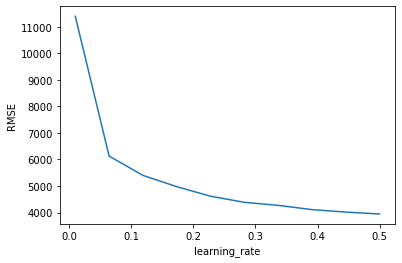

 Alcanzamos el minimo RMSE con learning_rate = 0.5


In [20]:
# learning_rate calibration

learning_rate_range = np.linspace(0.01, 0.5, num=10)
accuracy_scores = []

for learning_rate in learning_rate_range:
    
    clf = xg.XGBRegressor(objective ='reg:linear',learning_rate=learning_rate, verbosity = 0 )

    # Fitting the model
    clf.fit(XTrain, yTrain)

    # Predict the model
    pred = clf.predict(XTest)

    # RMSE Computation
    rmse=np.sqrt(MSE(yTest, pred))
    accuracy_scores.append(rmse)
    print(learning_rate,rmse)
plt.plot(learning_rate_range, accuracy_scores)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()
print(" Alcanzamos el minimo RMSE con learning_rate = " + str(learning_rate_range[np.argmin(accuracy_scores)]))

0.01 3943.7074707542192
0.06444444444444444 3943.7074707542192
0.11888888888888888 3943.7074707542192
0.17333333333333334 3943.7074707542192
0.22777777777777777 3943.7074707542192
0.2822222222222222 3943.7074707542192
0.33666666666666667 3943.7074707542192
0.3911111111111111 3943.7074707542192
0.44555555555555554 3943.7074707542192
0.5 3943.7074707542192


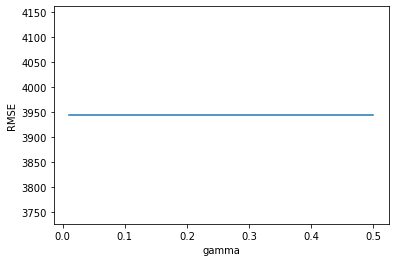

 Alcanzamos el minimo RMSE con gamma = 0.01


In [21]:
# gamma calibration
gamma_range = np.linspace(0.01, 0.5, num=10)
accuracy_scores = []
for gamma in gamma_range:
    
    clf = xg.XGBRegressor(objective ='reg:linear',learning_rate=0.5,gamma=gamma, verbosity = 0 )
    
    # Fitting the model
    clf.fit(XTrain, yTrain)

    # Predict the model
    pred = clf.predict(XTest)

    # RMSE Computation
    rmse=np.sqrt(MSE(yTest, pred))
    accuracy_scores.append(rmse)
    print(gamma,rmse)
    
plt.plot(gamma_range, accuracy_scores)
plt.xlabel('gamma')
plt.ylabel('RMSE')
plt.show()
print(" Alcanzamos el minimo RMSE con gamma = " + str(gamma_range[np.argmin(accuracy_scores)]))

0.01 6922.717824218017
0.06444444444444444 4436.667562966872
0.11888888888888888 4224.389462075159
0.17333333333333334 4138.637260101853
0.22777777777777777 4079.9504188185306
0.2822222222222222 4024.153009012537
0.33666666666666667 3978.0161313169065
0.3911111111111111 3970.32867487556
0.44555555555555554 3932.2784054020253
0.5 3928.5999556600464
0.5


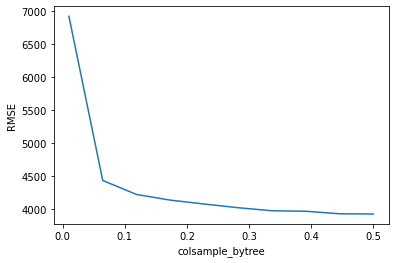

In [22]:
# colsample_bytree calibration
colsample_bytree_range = np.linspace(0.01, 0.5, num=10)
accuracy_scores = []
for colsample_bytree in colsample_bytree_range:
    
    clf = xg.XGBRegressor(objective ='reg:linear',learning_rate=0.5 ,gamma=0.01, colsample_bytree=colsample_bytree, verbosity = 0 )
    
    # Fitting the model
    clf.fit(XTrain, yTrain)

    # Predict the model
    pred = clf.predict(XTest)

    # RMSE Computation
    rmse=np.sqrt(MSE(yTest, pred))
    accuracy_scores.append(rmse)
    print(colsample_bytree,rmse)
    
print(colsample_bytree_range[np.argmin(accuracy_scores)])
plt.plot(colsample_bytree_range, accuracy_scores)
plt.xlabel('colsample_bytree')
plt.ylabel('RMSE')
plt.show()

1 6435.234397393223
2 5385.564874074578
3 4752.746583255182
4 4400.234989233147
5 4132.233903446572
6 3928.5999556600464
7 3824.4017315866613
8 3757.4223324893956
9 3711.6176983782825
9


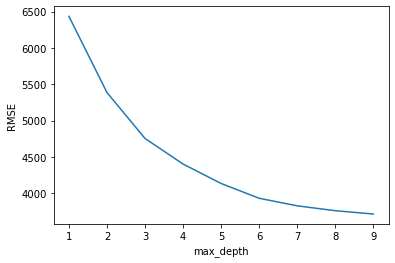

In [23]:
# colsample_bytree calibration
max_depth_range  =range(1, 10)

accuracy_scores = []
for max_depth in max_depth_range:
    
    clf = xg.XGBRegressor(objective ='reg:linear',learning_rate=0.5 ,gamma=0.01, colsample_bytree=0.5,max_depth=max_depth, verbosity = 0 )
    
    # Fitting the model
    clf.fit(XTrain, yTrain)

    # Predict the model
    pred = clf.predict(XTest)

    # RMSE Computation
    rmse=np.sqrt(MSE(yTest, pred))
    accuracy_scores.append(rmse)
    print(max_depth,rmse)
    
print(max_depth_range[np.argmin(accuracy_scores)])
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

1 3702.877089934034
2 3708.046293002487
3 3707.3549237678817
4 3707.351470475733
5 3704.8698432512992
6 3718.685719923281
7 3718.6912042401887
8 3718.6872164920333
9 3716.5579994318937
1


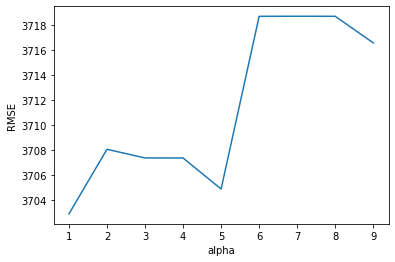

In [24]:
# colsample_bytree calibration
alpha_range = range(1, 10)


accuracy_scores = []
for alpha in alpha_range:
    
    clf = xg.XGBRegressor(objective ='reg:linear',learning_rate=0.5 ,gamma=0.01, colsample_bytree=0.5,max_depth=max_depth,alpha=alpha ,verbosity = 0 )
    
    # Fitting the model
    clf.fit(XTrain, yTrain)

    # Predict the model
    pred = clf.predict(XTest)

    # RMSE Computation
    rmse=np.sqrt(MSE(yTest, pred))
    accuracy_scores.append(rmse)
    print(alpha,rmse)
    
print(max_depth_range[np.argmin(accuracy_scores)])
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [71]:
clf = xg.XGBRegressor(booster='gbtree' ,objective ='reg:squarederror',learning_rate=0.5, colsample_bytree=0.5, max_depth=9,alpha=1,verbosity = 0 )    
# Fitting the model
clf.fit(XTrain, yTrain)
# Predict the model
pred = clf.predict(XTest)
# RMSE Computation
rmse_cal=np.sqrt(MSE(yTest, pred))
print('RMSE:',rmse_cal)

RMSE: 3709.3805238437812


<BarContainer object of 488 artists>

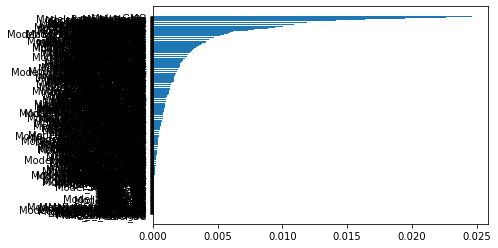

In [70]:
orden= clf.feature_importances_.argsort()
plt.barh(XTrain.columns[orden],clf.feature_importances_[orden])

In [68]:
indice=[]
for i in range(0,488):
    if clf.feature_importances_[i]>0.00:
        indice.append(i)

In [69]:
XTrain=XTrain[XTrain.columns[indice]]
XTest=XTest[XTest.columns[indice]]

print(XTrain.shape,XTest.shape)

(268000, 103) (132000, 103)


In [73]:
list(XTrain.columns[orden])

['Model_SC',
 'Model_PriusTwo',
 'Make_Volkswagen',
 'Model_300Limited',
 'Model_Altima4dr',
 'Model_C-ClassC350',
 'Model_CTS4dr',
 'Model_Model',
 'Model_Mazda35dr',
 'Model_ChargerSXT',
 'Model_CherokeeSport',
 'Model_CruzeLT',
 'Model_S804dr',
 'Model_IS',
 'Model_HighlanderLimited',
 'Model_Highlander4dr',
 'Model_FusionSE',
 'Model_F-1502WD',
 'Model_FusionS',
 'Model_Forester4dr',
 'Model_RangerSuperCab',
 'Model_RegalPremium',
 'Model_C-ClassC300',
 'State_ DC',
 'State_ WV',
 'State_ NC',
 'State_ DE',
 'State_ SC',
 'State_ AR',
 'State_ MO',
 'State_ HI',
 'State_ ID',
 'State_ OK',
 'State_ KS',
 'State_ LA',
 'State_ NJ',
 'State_ GA',
 'State_ IA',
 'State_ TN',
 'Model_CR-ZEX',
 'Model_F-150FX2',
 'State_ PA',
 'State_ NV',
 'State_ AZ',
 'State_ MN',
 'State_ WY',
 'State_ AK',
 'State_ ME',
 'State_ NH',
 'State_ CA',
 'State_ IN',
 'State_ VA',
 'State_ IL',
 'State_ ND',
 'State_ MA',
 'State_ SD',
 'State_ AL',
 'State_ KY',
 'State_ CT',
 'State_ NE',
 'State_ WI',

In [74]:
clf = xg.XGBRegressor(booster='gbtree' ,objective ='reg:squarederror',learning_rate=0.5, colsample_bytree=0.5, max_depth=9,alpha=1,verbosity = 0 )    
# Fitting the model
clf.fit(XTrain_New, yTrain)
# Predict the model
pred = clf.predict(XTest_New)
# RMSE Computation
rmse_cal=np.sqrt(MSE(yTest, pred))
print('RMSE:',rmse_cal)

RMSE: 9731.2915406438


NameError: name 'rmse_base' is not defined

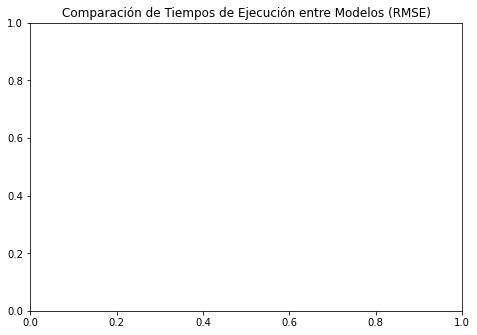

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Tiempos de Ejecución entre Modelos (RMSE)")
ejeX = ['XGBoost','XGBoost Cal.']
ejeY = [float(round(rmse_base,4)),float(round(rmse_cal,4))]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

In [42]:
# Visualización datos de test
dataTesting.head()

dataTesting['YearsBetween']=2022-dataTesting['Year']
dataTesting['MileagebyYear']=dataTesting['Mileage']/dataTesting['YearsBetween']
State=pd.get_dummies(dataTesting["State"], prefix='State')
dataTesting=pd.concat([dataTesting, State], axis=1)
Make=pd.get_dummies(dataTesting["Make"], prefix='Make')
dataTesting=pd.concat([dataTesting, Make], axis=1)
Model=pd.get_dummies(dataTesting["Model"], prefix='Model')
dataTesting=pd.concat([dataTesting, Model], axis=1)

dataTesting=dataTesting.drop(["State","Make","Model"], axis=1)
pred = clf.predict(dataTesting)

In [44]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [14]:
learning_rate_range = np.linspace(0.01, 0.5, num=10)
gamma_range = np.linspace(0.01, 0.5, num=10)
colsample_bytree_range = np.linspace(0.01, 0.5, num=10)
max_depth_range = estimator_range = range(1, 10)
alpha_range = estimator_range = range(1, 10)

In [1]:
estimator = xg.XGBRegressor()
 

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': learning_rate_range, #so called `eta` value
              'max_depth': max_depth_range,
              'min_child_weight': [4],
              'alpha': alpha_range,
              'colsample_bytree': colsample_bytree_range,
              'n_estimators': [300]}

xgb_grid = GridSearchCV(estimator,
                        parameters,
                        cv = 5,
                        n_jobs = 8,
                        verbose=True)


xgb_grid.fit(XTrain, yTrain)

NameError: name 'xg' is not defined